### Import libraries

In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import pandas as pd
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string

from ast import literal_eval

from mlrose_hiive import TSPGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

C:\Users\akoutras\AppData\Local\Temp\ipykernel_22168\854251365.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


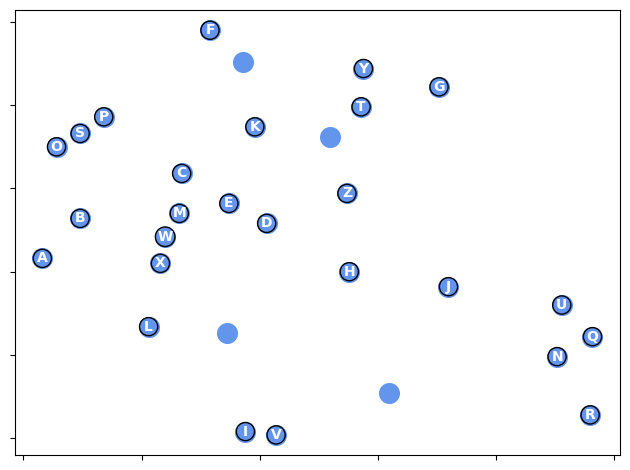

In [34]:
#903946366

# Large set
size = 30

# Generate a new TSP problem using a fixed seed.
problem = TSPGenerator().generate(seed=100, number_of_cities=size)

fig, ax = plt.subplots(1)         # Prepare 2 plots
ax.set_yticklabels([])
ax.set_xticklabels([])
for i, (x,y) in enumerate(problem.coords):
    ax.scatter(x,y, s=200, c='cornflowerblue')             # plot A
node_labels = {k:str(v) for k, v in enumerate(string.ascii_uppercase) if k < len(problem.source_graph.nodes)}
for i in node_labels.keys():
    x,y = problem.coords[i]
    plt.text(x, y, node_labels[i], ha="center", va="center", c='white', fontweight='bold',
             bbox = dict(boxstyle=f"circle,pad=0.15", fc='cornflowerblue'))

plt.tight_layout()
plt.show()

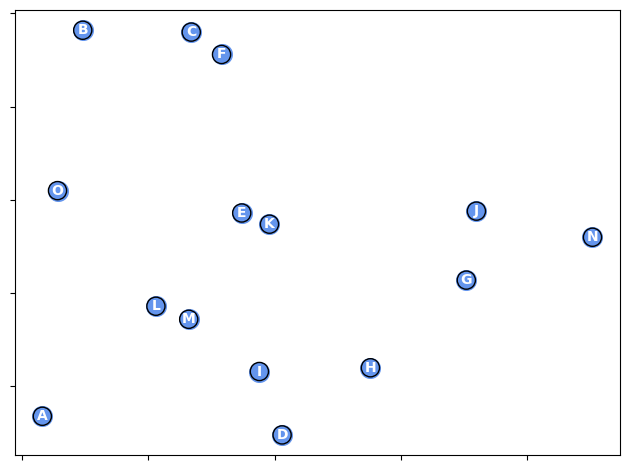

In [8]:
# Large set
size = 15

# Generate a new TSP problem using a fixed seed.
problem = TSPGenerator().generate(seed=100, number_of_cities=size)

fig, ax = plt.subplots(1)         # Prepare 2 plots
ax.set_yticklabels([])
ax.set_xticklabels([])
for i, (x,y) in enumerate(problem.coords):
    ax.scatter(x,y, s=200, c='cornflowerblue')             # plot A
node_labels = {k:str(v) for k, v in enumerate(string.ascii_uppercase) if k < len(problem.source_graph.nodes)}
for i in node_labels.keys():
    x,y = problem.coords[i]
    plt.text(x, y, node_labels[i], ha="center", va="center", c='white', fontweight='bold',
             bbox = dict(boxstyle=f"circle,pad=0.15", fc='cornflowerblue'))

plt.tight_layout()
plt.show()

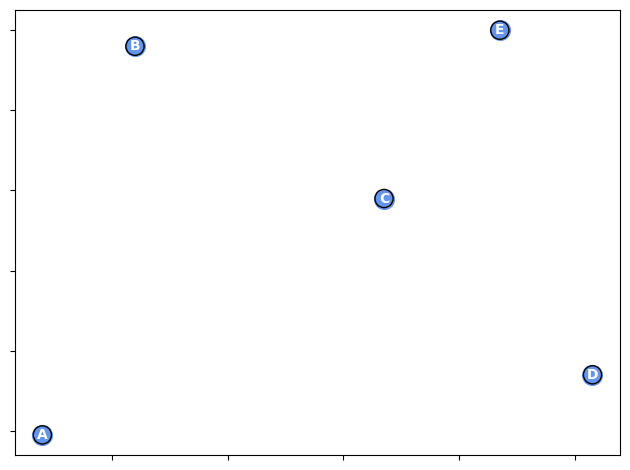

In [9]:
# Large set
size = 5

# Generate a new TSP problem using a fixed seed.
problem = TSPGenerator().generate(seed=100, number_of_cities=size)

fig, ax = plt.subplots(1)         # Prepare 2 plots
ax.set_yticklabels([])
ax.set_xticklabels([])
for i, (x,y) in enumerate(problem.coords):
    ax.scatter(x,y, s=200, c='cornflowerblue')             # plot A
node_labels = {k:str(v) for k, v in enumerate(string.ascii_uppercase) if k < len(problem.source_graph.nodes)}
for i in node_labels.keys():
    x,y = problem.coords[i]
    plt.text(x, y, node_labels[i], ha="center", va="center", c='white', fontweight='bold',
             bbox = dict(boxstyle=f"circle,pad=0.15", fc='cornflowerblue'))

plt.tight_layout()
plt.show()

#### 1d) TSP - Mimic 

In [50]:
# Large set
size = 30

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    
    # Generate a new TSP problem using a fixed seed.
    problem = TSPGenerator().generate(seed=100, number_of_cities=size)
    
    mmc = MIMICRunner(problem=problem,
                      experiment_name='tsp_mmc',
                      output_directory=None,
                      seed=seed,
                      iteration_list=np.arange(1,101),
                      max_attempts=500,
                      population_sizes=[500, 600, 700, 800, 1000],
                      keep_percent_list=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
        # the two data frames will contain the results
    df_run_stats, df_run_curves = mmc.run()
        
    if i==1:
        
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame()  
        
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_large = df_run_stats[['Iteration']]
df_fitness_large['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_large['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_large = df_run_stats[['Iteration']]
df_fevals_large['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_large['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_large = df_run_stats[['Iteration']]
df_time_large['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_large['std'] = df_time_seed[column_list].std(axis=1)

df_mmc_large = df_run_stats[['Iteration']]
df_mmc_large['Fitness_mean'] = df_fitness_large['mean']
df_mmc_large['Fitness_std']  = df_fitness_large['std']
df_mmc_large['FEvals_mean']  = df_fevals_large['mean']
df_mmc_large['FEvals_std']   = df_fevals_large['std']
df_mmc_large['Time_mean']    = df_time_large['mean']
df_mmc_large['Time_std']     = df_time_large['std']
df_mmc_large['Population Size']  = df_run_stats[['Population Size']]
df_mmc_large['Keep Percent']  = df_run_stats[['Keep Percent']]

df_mmc_large.to_csv('df_mmc_large.csv')

In [51]:
best_fitness_mmc_large = df_mmc_large['Fitness_mean'].min()
best_runs_mmc_large = df_mmc_large[df_mmc_large['Fitness_mean'] == best_fitness_mmc_large]
best_runs_mmc_large.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
2066,46,1675.842711,195.393991,47061.6,6.655825,100.455028,6.518048,1000,0.3
2067,47,1675.842711,195.393991,48062.6,6.655825,102.562406,6.555927,1000,0.3
2068,48,1675.842711,195.393991,49063.6,6.655825,104.625991,6.722076,1000,0.3
2069,49,1675.842711,195.393991,50064.6,6.655825,106.665346,6.795453,1000,0.3
2070,50,1675.842711,195.393991,51065.6,6.655825,108.619848,6.853315,1000,0.3


In [52]:
minimum_evaluations_mmc_large = best_runs_mmc_large['FEvals_mean'].min()
best_curve_run_mmc_large = best_runs_mmc_large[best_runs_mmc_large['FEvals_mean'] == minimum_evaluations_mmc_large]
minimum_time_mmc_large = best_curve_run_mmc_large['Time_mean'].min()
best_curve_run_mmc_large = best_curve_run_mmc_large[best_curve_run_mmc_large['Time_mean'] == minimum_time_mmc_large]
best_curve_run_mmc_large

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
2066,46,1675.842711,195.393991,47061.6,6.655825,100.455028,6.518048,1000,0.3


In [54]:
# Large set
size = 30

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    
    # Generate a new TSP problem using a fixed seed.
    problem = TSPGenerator().generate(seed=100, number_of_cities=size)
    
    mmc = MIMICRunner(problem=problem,
                      experiment_name='tsp_mmc',
                      output_directory=None,
                      seed=seed,
                      iteration_list=np.arange(1,101),
                      max_attempts=500,
                      population_sizes=[600, 750, 1000, 2000, 3000],
                      keep_percent_list=[0.2, 0.3, 0.4, 0.5, 0.6])
        # the two data frames will contain the results
    df_run_stats, df_run_curves = mmc.run()
        
    if i==1:
        
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame()  
        
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_large = df_run_stats[['Iteration']]
df_fitness_large['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_large['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_large = df_run_stats[['Iteration']]
df_fevals_large['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_large['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_large = df_run_stats[['Iteration']]
df_time_large['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_large['std'] = df_time_seed[column_list].std(axis=1)

df_mmc_large = df_run_stats[['Iteration']]
df_mmc_large['Fitness_mean'] = df_fitness_large['mean']
df_mmc_large['Fitness_std']  = df_fitness_large['std']
df_mmc_large['FEvals_mean']  = df_fevals_large['mean']
df_mmc_large['FEvals_std']   = df_fevals_large['std']
df_mmc_large['Time_mean']    = df_time_large['mean']
df_mmc_large['Time_std']     = df_time_large['std']
df_mmc_large['Population Size']  = df_run_stats[['Population Size']]
df_mmc_large['Keep Percent']  = df_run_stats[['Keep Percent']]

df_mmc_large.to_csv('df_mmc_large1.csv')

In [2]:
df_mmc_large = pd.read_csv('df_mmc_large1.csv')

best_fitness_mmc_large1 = df_mmc_large['Fitness_mean'].min()
best_runs_mmc_large1 = df_mmc_large[df_mmc_large['Fitness_mean'] == best_fitness_mmc_large1]
best_runs_mmc_large1.head()

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
2286,2286,64,1525.345545,39.355284,195083.8,4.816638,316.262589,11.964292,3000,0.4
2287,2287,65,1525.345545,39.355284,198084.8,4.816638,320.944171,12.022318,3000,0.4
2288,2288,66,1525.345545,39.355284,201085.8,4.816638,325.769950,12.087137,3000,0.4
2289,2289,67,1525.345545,39.355284,204086.8,4.816638,330.620155,12.182558,3000,0.4
2290,2290,68,1525.345545,39.355284,207087.8,4.816638,335.202286,12.222157,3000,0.4


In [56]:
minimum_evaluations_mmc_large1 = best_runs_mmc_large1['FEvals_mean'].min()
best_curve_run_mmc_large1 = best_runs_mmc_large1[best_runs_mmc_large1['FEvals_mean'] == minimum_evaluations_mmc_large1]
minimum_time_mmc_large1 = best_curve_run_mmc_large1['Time_mean'].min()
best_curve_run_mmc_large1 = best_curve_run_mmc_large1[best_curve_run_mmc_large1['Time_mean'] == minimum_time_mmc_large1]
best_curve_run_mmc_large1

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
2286,64,1525.345545,39.355284,195083.8,4.816638,316.262589,11.964292,3000,0.4


In [3]:
minimum_time_mmc_large1 = best_runs_mmc_large1['Time_mean'].min()
best_curve_run_mmc_large1 = best_runs_mmc_large1[best_runs_mmc_large1['Time_mean'] == minimum_time_mmc_large1]
best_curve_run_mmc_large1

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
2286,2286,64,1525.345545,39.355284,195083.8,4.816638,316.262589,11.964292,3000,0.4


In [3]:
# Large set
size = 30

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    
    # Generate a new TSP problem using a fixed seed.
    problem = TSPGenerator().generate(seed=100, number_of_cities=size)
    
    mmc = MIMICRunner(problem=problem,
                      experiment_name='tsp_mmc',
                      output_directory=None,
                      seed=seed,
                      iteration_list=np.arange(1,101),
                      max_attempts=500,
                      population_sizes=[100, 200, 300, 400, 500],
                      keep_percent_list=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
        # the two data frames will contain the results
    df_run_stats, df_run_curves = mmc.run()
        
    if i==1:
        
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame()  
        
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_large = df_run_stats[['Iteration']]
df_fitness_large['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_large['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_large = df_run_stats[['Iteration']]
df_fevals_large['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_large['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_large = df_run_stats[['Iteration']]
df_time_large['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_large['std'] = df_time_seed[column_list].std(axis=1)

df_mmc_large = df_run_stats[['Iteration']]
df_mmc_large['Fitness_mean'] = df_fitness_large['mean']
df_mmc_large['Fitness_std']  = df_fitness_large['std']
df_mmc_large['FEvals_mean']  = df_fevals_large['mean']
df_mmc_large['FEvals_std']   = df_fevals_large['std']
df_mmc_large['Time_mean']    = df_time_large['mean']
df_mmc_large['Time_std']     = df_time_large['std']
df_mmc_large['Population Size']  = df_run_stats[['Population Size']]
df_mmc_large['Keep Percent']  = df_run_stats[['Keep Percent']]

df_mmc_large.to_csv('df_mmc_large2.csv')

In [5]:
df_mmc_large = pd.read_csv('df_mmc_large2.csvp')
best_fitness_mmc_large1 = df_mmc_large['Fitness_mean'].min()
best_runs_mmc_large1 = df_mmc_large[df_mmc_large['Fitness_mean'] == best_fitness_mmc_large1]
best_runs_mmc_large1.head()

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
2792,2792,65,1985.046977,178.727988,33078.2,4.711688,75.163152,2.432734,500,0.5
2793,2793,66,1985.046977,178.727988,33579.2,4.711688,76.317819,2.321970,500,0.5
2794,2794,67,1985.046977,178.727988,34080.2,4.711688,77.494658,2.287793,500,0.5
2795,2795,68,1985.046977,178.727988,34581.2,4.711688,78.739595,2.221961,500,0.5
2796,2796,69,1985.046977,178.727988,35082.2,4.711688,79.904513,2.221314,500,0.5


In [6]:
minimum_evaluations_mmc_large1 = best_runs_mmc_large1['FEvals_mean'].min()
best_curve_run_mmc_large1 = best_runs_mmc_large1[best_runs_mmc_large1['FEvals_mean'] == minimum_evaluations_mmc_large1]
minimum_time_mmc_large1 = best_curve_run_mmc_large1['Time_mean'].min()
best_curve_run_mmc_large1 = best_curve_run_mmc_large1[best_curve_run_mmc_large1['Time_mean'] == minimum_time_mmc_large1]
best_curve_run_mmc_large1

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
2792,2792,65,1985.046977,178.727988,33078.2,4.711688,75.163152,2.432734,500,0.5


In [38]:
# Medium set
size = 15

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    
    # Generate a new TSP problem using a fixed seed.
    problem = TSPGenerator().generate(seed=100, number_of_cities=size)
    
    mmc = MIMICRunner(problem=problem,
                      experiment_name='tsp_mmc',
                      output_directory=None,
                      seed=seed,
                      iteration_list=np.arange(1,101),
                      max_attempts=500,
                      population_sizes=[100, 200, 300, 400, 500, 600, 700],
                      keep_percent_list=[0.1, 0.3, 0.5, 0.7])
        # the two data frames will contain the results
    df_run_stats, df_run_curves = mmc.run()
        
    if i==1:
        
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame()  
        
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_medium = df_run_stats[['Iteration']]
df_fitness_medium['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_medium['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_medium = df_run_stats[['Iteration']]
df_fevals_medium['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_medium['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_medium = df_run_stats[['Iteration']]
df_time_medium['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_medium['std'] = df_time_seed[column_list].std(axis=1)

df_mmc_medium = df_run_stats[['Iteration']]
df_mmc_medium['Fitness_mean'] = df_fitness_medium['mean']
df_mmc_medium['Fitness_std']  = df_fitness_medium['std']
df_mmc_medium['FEvals_mean']  = df_fevals_medium['mean']
df_mmc_medium['FEvals_std']   = df_fevals_medium['std']
df_mmc_medium['Time_mean']    = df_time_medium['mean']
df_mmc_medium['Time_std']     = df_time_medium['std']
df_mmc_medium['Population Size']  = df_run_stats[['Population Size']]
df_mmc_medium['Keep Percent']  = df_run_stats[['Keep Percent']]

df_mmc_medium.to_csv('df_mmc_medium.csv')

In [39]:
best_fitness_mmc_medium = df_mmc_medium['Fitness_mean'].min()
best_runs_mmc_medium = df_mmc_medium[df_mmc_medium['Fitness_mean'] == best_fitness_mmc_medium]
best_runs_mmc_medium.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
2540,15,892.590738,47.269856,11222.8,1.923538,10.928616,0.389146,700,0.3
2541,16,892.590738,47.269856,11923.8,1.923538,11.717151,0.459886,700,0.3
2542,17,892.590738,47.269856,12624.8,1.923538,12.465607,0.525498,700,0.3
2543,18,892.590738,47.269856,13325.8,1.923538,13.192546,0.551925,700,0.3
2544,19,892.590738,47.269856,14026.8,1.923538,13.908588,0.513118,700,0.3


In [40]:
minimum_evaluations_mmc_medium = best_runs_mmc_medium['FEvals_mean'].min()
best_curve_run_mmc_medium = best_runs_mmc_medium[best_runs_mmc_medium['FEvals_mean'] == minimum_evaluations_mmc_medium]
minimum_time_mmc_medium = best_curve_run_mmc_medium['Time_mean'].min()
best_curve_run_mmc_medium = best_curve_run_mmc_medium[best_curve_run_mmc_medium['Time_mean'] == minimum_time_mmc_medium]
best_curve_run_mmc_medium

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
2540,15,892.590738,47.269856,11222.8,1.923538,10.928616,0.389146,700,0.3


In [41]:
# Small set
size = 5

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    
    # Generate a new TSP problem using a fixed seed.
    problem = TSPGenerator().generate(seed=100, number_of_cities=size)
    
    mmc = MIMICRunner(problem=problem,
                      experiment_name='tsp_mmc',
                      output_directory=None,
                      seed=seed,
                      iteration_list=np.arange(1,101),
                      max_attempts=500,
                      population_sizes=[100, 200, 300, 400, 500, 600, 700],
                      keep_percent_list=[0.1, 0.3, 0.5, 0.7])
        # the two data frames will contain the results
    df_run_stats, df_run_curves = mmc.run()
        
    if i==1:
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_small = df_run_stats[['Iteration']]
df_fitness_small['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_small['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_small = df_run_stats[['Iteration']]
df_fevals_small['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_small['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_small = df_run_stats[['Iteration']]
df_time_small['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_small['std'] = df_time_seed[column_list].std(axis=1)

df_mmc_small = df_run_stats[['Iteration']]
df_mmc_small['Fitness_mean'] = df_fitness_small['mean']
df_mmc_small['Fitness_std']  = df_fitness_small['std']
df_mmc_small['FEvals_mean']  = df_fevals_small['mean']
df_mmc_small['FEvals_std']   = df_fevals_small['std']
df_mmc_small['Time_mean']    = df_time_small['mean']
df_mmc_small['Time_std']     = df_time_small['std']
df_mmc_small['Population Size']  = df_run_stats[['Population Size']]
df_mmc_small['Keep Percent']  = df_run_stats[['Keep Percent']]

df_mmc_small.to_csv('df_mmc_small.csv')

In [4]:
df_mmc_small = pd.read_csv('df_mmc_small.csv')
best_fitness_mmc_small = df_mmc_small['Fitness_mean'].min()
best_runs_mmc_small = df_mmc_small[df_mmc_small['Fitness_mean'] == best_fitness_mmc_small]
best_runs_mmc_small.head()

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
1,1,1,360.984004,0.0,202.0,0.0,0.052994,0.007437,100,0.1
2,2,2,360.984004,0.0,303.0,0.0,0.096904,0.009334,100,0.1
3,3,3,360.984004,0.0,404.0,0.0,0.139581,0.009794,100,0.1
4,4,4,360.984004,0.0,505.0,0.0,0.183940,0.013717,100,0.1
5,5,5,360.984004,0.0,606.0,0.0,0.228226,0.014140,100,0.1


In [43]:
minimum_evaluations_mmc_small = best_runs_mmc_small['FEvals_mean'].min()
best_curve_run_mmc_small = best_runs_mmc_small[best_runs_mmc_small['FEvals_mean'] == minimum_evaluations_mmc_small]
minimum_time_mmc_small = best_curve_run_mmc_small['Time_mean'].min()
best_curve_run_mmc_small = best_curve_run_mmc_small[best_curve_run_mmc_small['Time_mean'] == minimum_time_mmc_small]
best_curve_run_mmc_small

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
203,1,360.984004,0.0,202.0,0.0,0.045723,0.005372,100,0.5


In [5]:
minimum_time_mmc_small =   best_runs_mmc_small['Time_mean'].min()
best_curve_run_mmc_small = best_runs_mmc_small[best_runs_mmc_small['Time_mean'] == minimum_time_mmc_small]
best_curve_run_mmc_small

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
203,203,1,360.984004,0.0,202.0,0.0,0.045723,0.005372,100,0.5


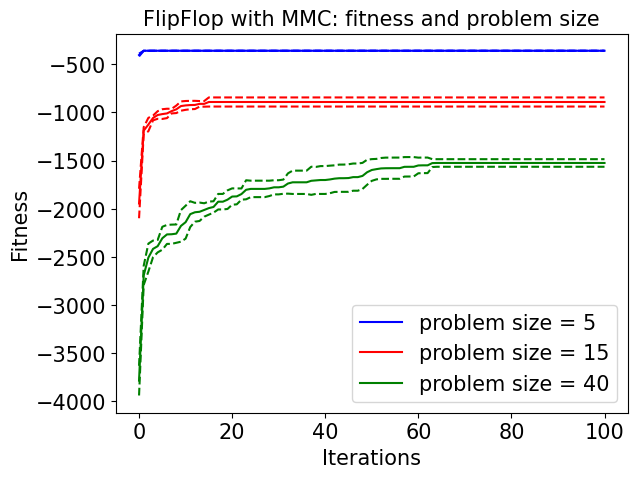

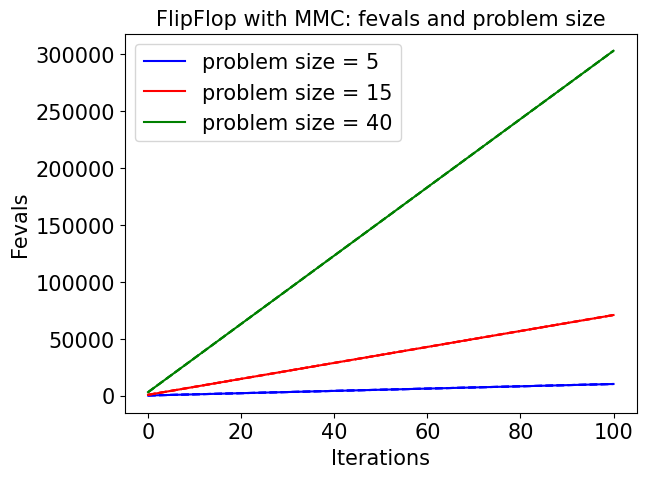

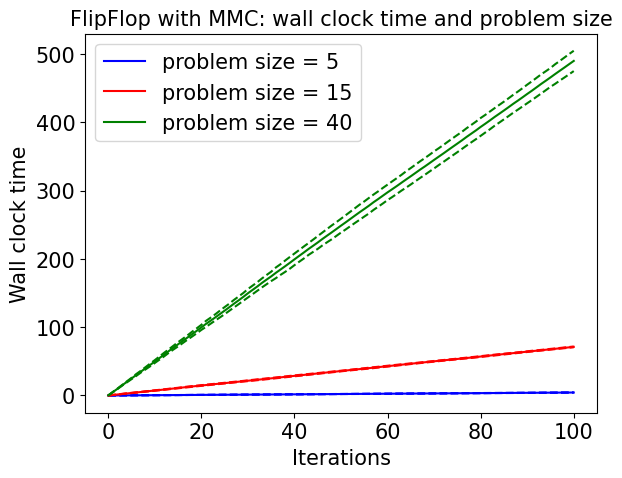

In [61]:
#fontsize = 15
#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
#ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.1]['Iteration'].values, 
#        -df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.1]['Fitness_mean'].values, 
#        label='problem size = 5')
#
#ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
#        -df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Fitness_mean'].values, 
#        label='problem size = 15')
#
#ax.plot(df_mmc_large[df_mmc_large['Population Size']==700][df_mmc_large['Keep Percent']==0.5]['Iteration'].values, 
#        -df_mmc_large[df_mmc_large['Population Size']==700][df_mmc_large['Keep Percent']==0.5]['Fitness_mean'].values, 
#        label='problem size = 30')
#
#ax.legend(fontsize=fontsize)
#ax.set_title('MMC Fitness and problem size', fontsize=fontsize)
#ax.tick_params(labelsize=fontsize)
#ax.set_xlabel('Iterations', fontsize=fontsize) 
#ax.set_ylabel('Fitness', fontsize=fontsize)
##ax.set_ylim(0.6, 1.02)
##ax.set_xlim(0, 4000)
##fig.savefig('DT-learning_curves-roc_auc.png')
#plt.show()
#plt.close(fig)





fontsize = 15
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        -df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Fitness_mean'].values, label='problem size = 5', color='b')
ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
      -(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Fitness_mean'].values +
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Fitness_std'].values),'--b')
ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
      -(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Fitness_mean'].values -
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Fitness_std'].values), '--b')

ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        -df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Fitness_mean'].values, label='problem size = 15', color='r')
ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
       -(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Fitness_mean'].values +
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Fitness_std'].values),'--r')
ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
      -(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Fitness_mean'].values -
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Fitness_std'].values), '--r')

ax.plot(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        -df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Fitness_mean'].values, label='problem size = 40', color='g')
ax.plot(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
       -(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Fitness_mean'].values +
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Fitness_std'].values), '--g')
ax.plot(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
       -(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Fitness_mean'].values -
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Fitness_std'].values), '--g')
        
ax.legend(fontsize=fontsize)
ax.set_title('FlipFlop with MMC: fitness and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['FEvals_mean'].values, label='problem size = 5', color='b')
ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['FEvals_mean'].values +
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['FEvals_std'].values,'--b')
ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['FEvals_mean'].values -
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['FEvals_std'].values, '--b')

ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['FEvals_mean'].values, label='problem size = 15', color='r')
ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['FEvals_mean'].values +
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['FEvals_std'].values,'--r')
ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['FEvals_mean'].values -
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['FEvals_std'].values, '--r')

ax.plot(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['FEvals_mean'].values, label='problem size = 40', color='g')
ax.plot(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['FEvals_mean'].values +
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['FEvals_std'].values, '--g')
ax.plot(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['FEvals_mean'].values -
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['FEvals_std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('FlipFlop with MMC: fevals and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Time_mean'].values, label='problem size = 5', color='b')
ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Time_mean'].values +
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Time_std'].values,'--b')
ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Time_mean'].values -
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Time_std'].values, '--b')

ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Time_mean'].values, label='problem size = 15', color='r')
ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Time_mean'].values +
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Time_std'].values,'--r')
ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Time_mean'].values -
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Time_std'].values, '--r')

ax.plot(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Time_mean'].values, label='problem size = 40', color='g')
ax.plot(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Time_mean'].values +
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Time_std'].values, '--g')
ax.plot(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Time_mean'].values -
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Time_std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('FlipFlop with MMC: wall clock time and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)

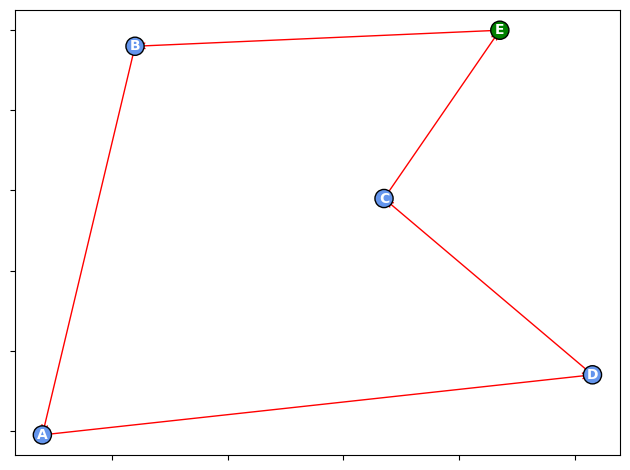

In [48]:
run_stats_best_run = df_run_stats[(df_run_stats['Keep Percent'] == 0.1 ) & (df_run_stats['Population Size'] == 100)]
HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time']].to_html())

ordered_state = literal_eval(run_stats_best_run['State'].tail(1).values[0])
edge_labels = {(ordered_state[i], ordered_state[(i+1) % len(ordered_state)]):f'{str(i+1)}➜' for i in range(len(ordered_state))}
# print(ordered_state)

fig, ax = plt.subplots(1)         # Prepare 2 plots
ax.set_yticklabels([])
ax.set_xticklabels([])
for i, (x,y) in enumerate(problem.coords):
    ax.scatter(x,y, s=1,c='green' if i == 5 else 'cornflowerblue')             # plot A


for i in range(len(ordered_state)):
    start_node = ordered_state[i]
    end_node = ordered_state[(i+1) % len(ordered_state)]
    start_pos = problem.coords[start_node]
    end_pos = problem.coords[end_node]
    ax.annotate("",
            xy=start_pos, xycoords='data',
            xytext=end_pos, textcoords='data',
            c='red',
            arrowprops=dict(arrowstyle="->",
                            ec='red',
                            connectionstyle="arc3"))
node_labels = {k:str(v) for k, v in enumerate(string.ascii_uppercase) if k < len(problem.source_graph.nodes)}

for i in node_labels.keys():
    x,y = problem.coords[i]
    plt.text(x, y, node_labels[i], ha="center", va="center", c='white', fontweight='bold',
             bbox = dict(boxstyle=f"circle,pad=0.15", fc='green' if i == ordered_state[0] else 'cornflowerblue'))

plt.tight_layout()
plt.show()